In [57]:
l = float(input("Enter the wavelength: "))

Enter the wavelength: 1.2


In [58]:
nxsq = 2.72186 + 0.01668 / (l**2 - 0.01546) - 0.00983 * l**2
nysq = 2.78252 + 0.01767 / (l**2 - 0.01562) - 0.0111 * l**2
nzsq = 2.83314 + 0.01834 / (l**2 - 0.01584) - 0.01179 * l**2

nx2wsq = 2.72186 + 0.01668 / ((l/2)**2 - 0.01546) - 0.00983 * (l/2)**2
ny2wsq = 2.78252 + 0.01767 / ((l/2)**2 - 0.01562) - 0.0111 * (l/2)**2
nz2wsq = 2.83314 + 0.01834 / ((l/2)**2 - 0.01584) - 0.01179 * (l/2)**2

In [59]:
print(nxsq, nysq, nzsq)
print(nx2wsq, ny2wsq, nz2wsq)

2.719413842919118 2.7789413974360775 2.829040166543085
2.766733575921519 2.829833599860619 2.882184767828917


In [60]:
import numpy as np
from scipy.optimize import minimize

In [61]:
import matplotlib.pyplot as plt

In [62]:
def objective(phi):
    
    kx = np.sin(1/2*np.pi) * np.cos(phi)
    ky = np.sin(1/2*np.pi) * np.sin (phi)
    kz = np.cos(1/2*np.pi)
    
    a1 = nxsq**(-1)
    b1 = nysq**(-1)
    c1 = nzsq**(-1)

    a2 = nx2wsq**(-1)
    b2 = ny2wsq**(-1)
    c2 = nz2wsq**(-1)

    B1 = (-(kx**2)*(b1+c1) - (ky**2)*(a1+c1) - (kz**2)*(a1+b1))
    C1 = (kx**2)*b1*c1 + (ky**2)*a1*c1 + (kz**2)*a1*b1

    B2 = (-(kx**2)*(b2+c2) - (ky**2)*(a2+c2) - (kz**2)*(a2+b2))
    C2 = (kx**2)*b2*c2 + (ky**2)*a2*c2 + (kz**2)*a2*b2

    eq1 = np.sqrt(2)/np.sqrt(-B1 - np.sqrt(B1**2 - 4*C1))
    eq2 = np.sqrt(2)/np.sqrt(-B2 + np.sqrt(B2**2 - 4*C2))
    
    # this needs to be absolute value of the difference
    return abs(eq1 - eq2)

In [63]:
bounds_phi = (0*np.pi/180, 90*np.pi/180)
bounds = [bounds_phi]
phi = 20*np.pi/180

In [64]:
result = minimize(objective, phi, method = 'SLSQP', bounds = bounds)
print(result)

     fun: 6.377005923319246e-08
     jac: array([0.00423065])
 message: 'Optimization terminated successfully.'
    nfev: 34
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.11110657])


In [65]:
print(result.x *180/np.pi)

[6.36593751]


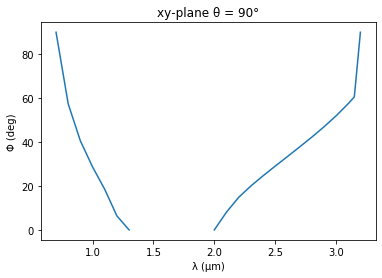

In [66]:
x = [0.7,0.8,0.9,1,1.1,1.2,1.3,1.9,2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3,3.1,3.15,3.2]
y = [90,57.36,40.52,28.68,18.46,6.37,0,-np.inf,0,8.1,14.82,19.99,24.62,29.04,33.37,37.74,42.21,46.9,51.92,57.48,60.56,90]
plt.plot(x,y)
plt.xlabel('λ (μm)')
plt.ylabel('Φ (deg)')
plt.title('xy-plane θ = 90°')
plt.show()

In [67]:
def objective(theta): 
    
    kx = np.sin(theta) * np.cos(1/2*np.pi)
    ky = np.sin(theta) * np.sin(1/2*np.pi)
    kz = np.cos(theta)
    
    a1 = nxsq**(-1)
    b1 = nysq**(-1)
    c1 = nzsq**(-1)

    a2 = nx2wsq**(-1)
    b2 = ny2wsq**(-1)
    c2 = nz2wsq**(-1)

    B1 = (-(kx**2)*(b1+c1) - (ky**2)*(a1+c1) - (kz**2)*(a1+b1))
    C1 = (kx**2)*b1*c1 + (ky**2)*a1*c1 + (kz**2)*a1*b1

    B2 = (-(kx**2)*(b2+c2) - (ky**2)*(a2+c2) - (kz**2)*(a2+b2))
    C2 = (kx**2)*b2*c2 + (ky**2)*a2*c2 + (kz**2)*a2*b2

    eq1 = np.sqrt(2)/np.sqrt(-B1 - np.sqrt(B1**2 - 4*C1))
    eq2 = np.sqrt(2)/np.sqrt(-B2 + np.sqrt(B2**2 - 4*C2))
    
    return abs(eq1 - eq2)

In [68]:
bounds_theta = (0*np.pi/180, 90*np.pi/180)
bounds = [bounds_theta]
theta = 20*np.pi/180

In [69]:
result = minimize(objective, theta, method = 'SLSQP', bounds = bounds)
print(result)

     fun: 0.0036656097756642136
     jac: array([-5.36441803e-07])
 message: 'Optimization terminated successfully.'
    nfev: 15
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.])


In [70]:
print(result.x *180/np.pi)

[0.]


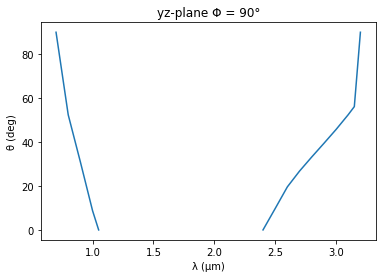

In [71]:
x = [0.7,0.8,0.9,1,1.05,1.1,2.4,2.5,2.6,2.7,2.8,2.9,3,3.1,3.15,3.2]
y = [90,52.41,30.93,8.74,0,-np.inf,0,9.74,19.6,26.78,33.19,39.4,45.72,52.47,56.14,90]
plt.plot(x,y)
plt.xlabel('λ (μm)')
plt.ylabel('θ (deg)')
plt.title('yz-plane Φ = 90°')
plt.show()

In [72]:
def objective(theta): 
    
    kx = np.sin(theta) * np.cos(0)
    ky = np.sin(theta) * np.sin(0)
    kz = np.cos(theta)
    
    a1 = nxsq**(-1)
    b1 = nysq**(-1)
    c1 = nzsq**(-1)

    a2 = nx2wsq**(-1)
    b2 = ny2wsq**(-1)
    c2 = nz2wsq**(-1)

    B1 = (-(kx**2)*(b1+c1) - (ky**2)*(a1+c1) - (kz**2)*(a1+b1))
    C1 = (kx**2)*b1*c1 + (ky**2)*a1*c1 + (kz**2)*a1*b1

    B2 = (-(kx**2)*(b2+c2) - (ky**2)*(a2+c2) - (kz**2)*(a2+b2))
    C2 = (kx**2)*b2*c2 + (ky**2)*a2*c2 + (kz**2)*a2*b2

    eq1 = np.sqrt(2)/np.sqrt(-B1 - np.sqrt(B1**2 - 4*C1))
    eq2 = np.sqrt(2)/np.sqrt(-B2 + np.sqrt(B2**2 - 4*C2))
    
    return abs(eq1 - eq2)

In [73]:
bounds_theta = (0*np.pi/180, 40*np.pi/180)
bounds = [bounds_theta]
theta = 20*np.pi/180

In [74]:
result = minimize(objective, theta, method = 'SLSQP', bounds = bounds)
print(result)

     fun: 5.928590951498336e-11
     jac: array([0.02095734])
 message: 'Optimization terminated successfully.'
    nfev: 18
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0.33753527])


In [75]:
print(result.x *180/np.pi)

[19.33934665]


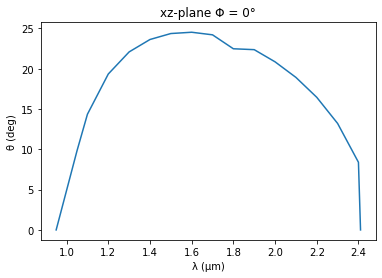

In [76]:
x = [0.95,1.05,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,2.1,2.2,2.3,2.4,2.41]
y = [0,9.82,14.35,19.34,22.08,23.62,24.36,24.52,24.2,22.47,22.36,20.85,18.92,16.45,13.21,8.39,0]
plt.plot(x,y)
plt.xlabel('λ (μm)')
plt.ylabel('θ (deg)')
plt.title('xz-plane Φ = 0°')
plt.show()